<a href="https://colab.research.google.com/github/SrMouraSilva/Aprendizagem-probabilistica/blob/main/Trabalho_2_Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por favor, veja esse arquivo online em: https://colab.research.google.com/drive/1WBh6kOt13XZaVU-ZtfBmN0eNdPOs56IP?usp=sharing


In [ ]:
# Programação simbólica
import sympy as sp
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nas células
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

In [ ]:
# Ajustes nas configurações padrões dos plots
mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

Universidade Federal do Ceará
* **Disciplina**: TÓPICOS AVANÇADOS EM APRENDIZAGEM DE MÁQUINA / TÓPICOS ESPECIAIS EM LÓGICA II
* **Código**: CK0255/CKP8377
* **Professores**: João Paulo P. Gomes / César Lincoln C. Mattos
* **Semestre**: 2020.2
* **Discente**: Paulo Mateus M. da Silva
* **Matrícula**: 486351
* **Curso**: Ciência da Computação

# Trabalho 2

> **Leia as instruções:**
> 
> * O trabalho é individual.
> * As simulações poderão ser realizadas em quaiquer linguagens de programação.
> * Para a avaliação do trabalho deverá ser submetido um arquivo pdf com texto e figuras referentes aos
resultados das simulações.
> * Para a avaliação do trabalho deverão ser enviados os códigos fonte.


## Item 1. Implemente um modelo de regressão Logística Bayesiana para os dados disponı́veis em `logistic_regression_data.csv`

* Apresente um gráfico contendo os dados e uma representação da distribuição preditiva encontrada.
* A solução MAP deve ser encontrada através do algoritmo IRLS.

### Arquivo `logistic_regression_data.csv`

**Obs**: Adicionei uma linha cabeçalho

In [ ]:
#@markdown
import csv
from io import StringIO

logistic_regression_data = """x1,x2,y
1.581472444419677492e+00,-1.449019987195103498e+00,0.000000000000000000e+00
2.032725492280884172e+00,-1.108874293026270941e+00,0.000000000000000000e+00
8.746242854797554589e-01,-7.463898809429362347e-01,0.000000000000000000e+00
-1.695794552013364154e+00,-5.465131046361099143e-01,1.000000000000000000e+00
1.592452826427275481e+00,-7.720678824782064575e-01,0.000000000000000000e+00
-6.783875823791096771e-01,1.616692172537357863e-01,1.000000000000000000e+00
2.282038741761819090e+00,5.011075528380217747e-01,0.000000000000000000e+00
9.543165803281048465e-01,-2.187927648123296542e+00,0.000000000000000000e+00
-1.145477008361842852e+00,5.413432203976147328e-01,1.000000000000000000e+00
1.896626537990973471e+00,-1.023025422701128173e+00,0.000000000000000000e+00
-1.082998028334904994e+00,1.680425116064386826e-01,1.000000000000000000e+00
-1.118314621677284126e+00,3.482842854365751362e-01,1.000000000000000000e+00
1.719068867856830884e+00,-1.270226005903205113e+00,0.000000000000000000e+00
3.941839137354151146e-01,-1.238717935821436855e+00,0.000000000000000000e+00
-1.330808058251403470e+00,7.362072145402389634e-01,1.000000000000000000e+00
1.438508251296690688e+00,-1.745253975606256391e+00,0.000000000000000000e+00
4.158696905184174897e-01,-1.022404863692898846e+00,0.000000000000000000e+00
-7.973385375838963895e-01,6.188782903356111476e-01,1.000000000000000000e+00
-5.548885359675724827e-01,1.432322925020062809e-01,1.000000000000000000e+00
1.769249622105090181e+00,-1.049976852057002086e+00,0.000000000000000000e+00
6.577913693469837897e-01,-1.610289973930143503e+00,0.000000000000000000e+00
-1.063516945073146758e+00,5.431391699958822983e-01,1.000000000000000000e+00
-1.149903582037452993e-01,2.748989173653485496e-01,1.000000000000000000e+00
2.217950816877915621e+00,-5.897143615720741305e-01,0.000000000000000000e+00
1.226332707444202502e-01,-6.264375720015215032e-01,1.000000000000000000e+00
-5.297412401830787348e-02,-1.175985431169754292e-01,0.000000000000000000e+00
-1.342253938625292742e+00,6.393539923893625243e-01,1.000000000000000000e+00
1.620109008854571764e+00,5.288088684680284368e-01,0.000000000000000000e+00
1.189841345407390616e+00,-4.309071691767433349e-02,0.000000000000000000e+00
5.874192741788213379e-01,-4.418722889196216586e-02,0.000000000000000000e+00
1.261707274416769664e+00,-1.393778771538937811e+00,0.000000000000000000e+00
1.344862665861364270e+00,-1.126723746472679144e+00,0.000000000000000000e+00
6.177852991228827140e-01,-5.254272039168860209e-01,0.000000000000000000e+00
-1.378389584560717696e+00,5.360771254178579026e-01,1.000000000000000000e+00
1.572627179850105028e+00,2.681473426432573470e-01,0.000000000000000000e+00
9.114940769440607049e-01,-1.222440651969758374e-01,0.000000000000000000e+00
1.476378423434714593e+00,7.230739866252990922e-01,0.000000000000000000e+00
-2.506817423845641435e-01,6.453295128147205073e-01,1.000000000000000000e+00
-1.333826895922899158e+00,5.051662218573748087e-01,1.000000000000000000e+00
8.527166780296456805e-01,-9.126938893908765893e-01,0.000000000000000000e+00
-8.373970181855157069e-01,-5.384800776301428282e-01,1.000000000000000000e+00
6.971149595384651398e-01,-1.332427897396959438e+00,0.000000000000000000e+00
-9.475261446850148372e-01,4.842569115177233208e-01,1.000000000000000000e+00
-7.684449160478495910e-01,1.361555601468350807e-01,1.000000000000000000e+00
-8.279742649271850663e-01,-1.276940530314463862e+00,1.000000000000000000e+00
-1.230322549777276508e+00,-6.170821258066023357e-02,1.000000000000000000e+00
1.016642835453356097e+00,-1.143228871217288445e+00,0.000000000000000000e+00
1.296836655538295302e+00,-8.829334232286352169e-01,0.000000000000000000e+00
-1.484229631035867802e+00,5.564266767928960356e-01,1.000000000000000000e+00
1.988086154764925118e+00,-2.429617488304397221e-01,0.000000000000000000e+00
1.712597056765115422e+00,-1.362001777908260269e+00,0.000000000000000000e+00
5.071944037864620780e-01,-1.413847165087556812e+00,0.000000000000000000e+00
-1.164927106676876933e+00,1.136226012307086419e+00,1.000000000000000000e+00
-8.838319233119217300e-01,1.253121316952318987e+00,1.000000000000000000e+00
-1.230341257189282667e+00,1.439953850102607236e+00,1.000000000000000000e+00
9.224180281216873833e-01,-1.264130610477352423e+00,0.000000000000000000e+00
1.489919105300137492e+00,1.256666284689599289e-01,0.000000000000000000e+00
-6.653994001371339728e-02,3.200819459222268848e-01,1.000000000000000000e+00
-1.124023078761498678e-01,-1.247993697164294230e-01,1.000000000000000000e+00
-6.881377177629999231e-01,1.298944844629529971e+00,1.000000000000000000e+00
6.754064896997847844e-01,-2.496746712913728017e-01,0.000000000000000000e+00
1.108204443657770932e+00,-1.016387541692159724e-01,0.000000000000000000e+00
2.527818179397636200e-01,8.370980155474104789e-01,1.000000000000000000e+00
-1.673711922618553949e+00,2.865090857484320908e-01,1.000000000000000000e+00
-1.125630157406616094e+00,6.770557256210054664e-01,1.000000000000000000e+00
-5.751999736905375471e-01,-1.875443694090315680e-02,1.000000000000000000e+00
1.274823523112808443e+00,-6.847926363636817060e-01,0.000000000000000000e+00
-1.472183227306467890e+00,-1.275052768710641382e-01,1.000000000000000000e+00
8.813483871903565747e-01,-3.689093342640650808e-01,0.000000000000000000e+00
-1.079496060035919580e+00,4.060499838078364676e-01,1.000000000000000000e+00
-6.355017138425477219e-01,1.796034203109240501e-01,1.000000000000000000e+00
-2.167199402609967240e-01,-9.097603664323932193e-01,0.000000000000000000e+00
1.093728806353890581e+00,-3.071946344209355861e-01,0.000000000000000000e+00
-5.237987916147880396e-01,6.403153226671610687e-01,1.000000000000000000e+00
1.898921356164424923e+00,-1.015973832094521356e-01,0.000000000000000000e+00
-4.960787661720793551e-01,7.353933667637261307e-01,1.000000000000000000e+00
1.633765092898338933e+00,-4.701084058153301992e-01,0.000000000000000000e+00
-6.340493994994838012e-01,3.514483916220080273e-01,1.000000000000000000e+00
1.116730417188337654e+00,-8.041377443542697678e-01,0.000000000000000000e+00
-8.691139840204901157e-01,8.694172397102218897e-01,1.000000000000000000e+00
-7.168248584621356168e-01,1.259777378731451680e+00,1.000000000000000000e+00
2.382599030767776682e+00,-4.556929386421008643e-01,0.000000000000000000e+00
-9.232851275880552544e-01,3.612200209763861136e-01,1.000000000000000000e+00
-8.619512625835699104e-01,8.458237197302432842e-01,1.000000000000000000e+00
7.260129463261667526e-01,-7.294960190636486930e-01,0.000000000000000000e+00
1.856663211468629004e+00,-2.430003966259568216e-01,0.000000000000000000e+00
-1.816112179466783105e-01,2.722366149893064580e-01,1.000000000000000000e+00
-3.879872960305498220e-01,6.161897273764342930e-01,1.000000000000000000e+00
-8.915094258238253078e-01,3.178358500446943347e-01,1.000000000000000000e+00
4.458484359689435794e-01,-5.707912119631357584e-01,0.000000000000000000e+00
-1.230172447027236160e+00,-9.133950115254243496e-01,1.000000000000000000e+00
-8.386684318112230807e-01,4.496768838158412551e-01,1.000000000000000000e+00
1.366558761063651484e-01,-1.055914534300754326e+00,0.000000000000000000e+00
1.775020436640549093e+00,-1.145917977191448278e+00,0.000000000000000000e+00
-1.500053348248847174e+00,4.253222716172264106e-01,1.000000000000000000e+00
-7.043862808731021774e-01,-4.000923156019099425e-01,1.000000000000000000e+00
6.404500401702440948e-01,-1.544643221669533828e+00,0.000000000000000000e+00
-8.265917255865853353e-01,3.978151691508885479e-01,1.000000000000000000e+00
-1.913716254918738369e-01,3.886142361376090371e-01,1.000000000000000000e+00
7.801056281827772887e-01,2.123481849528870424e-01,0.000000000000000000e+00
"""

dataset_1 = pd.read_csv(StringIO(logistic_regression_data))
dataset_1

,x1,x2,y
0,1.581472,-1.449020,0.0
1,2.032725,-1.108874,0.0
2,0.874624,-0.746390,0.0
3,-1.695795,-0.546513,1.0
4,1.592453,-0.772068,0.0
...,...,...,...
95,-0.704386,-0.400092,1.0
96,0.640450,-1.544643,0.0
97,-0.826592,0.397815,1.0
98,-0.191372,0.388614,1.0


### Gráfico dos pontos de `logistic_regression_data.csv`

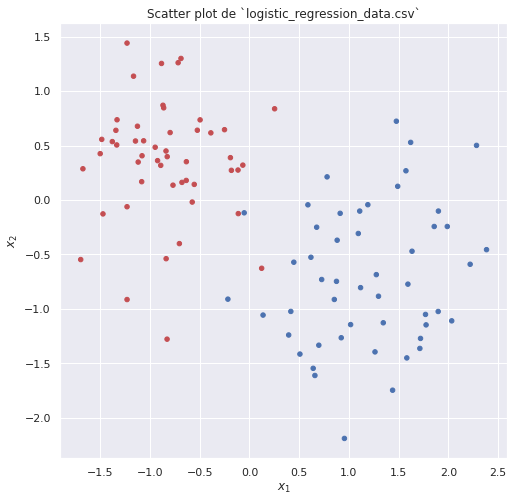

In [ ]:
cores = (dataset_1.y == 1.0).map(lambda i: 'r' if i else 'b' )

ax = dataset_1.plot.scatter(x='x1', y='x2', title="Scatter plot de `logistic_regression_data.csv`", c=cores)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$");

### Implementação do modelo

#### `RegressaoLogisticaIRLS`

> Primeiro é apresentado o modelo de Regressão Logística não Bayesiano que utiliza IRLS. A versão Bayesiana se utilizará desta não Bayesiana.

`RegressaoLogisticaIRLS` = Regressão Logística utilizando IRLS.

* @param $D$: Quantidade de atributos (incluindo a constante $1$);
* @param $\boldsymbol{m}_0$: Médias da priori: $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_0, \boldsymbol{S}_0)$
* @param $\boldsymbol{S}_0$: Matriz de covariância da priori: $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_0, \boldsymbol{S}_0)$
* @param σ: Função de ativação. Por padrão, sigmoid: $σ(z) = \frac{1}{1+\exp(-z)}$

In [ ]:
from scipy.special import expit
sigmoid = expit


class RegressaoLogisticaIRLS:
    def __init__(self, D, m_0, S_0, σ=sigmoid):
        """
        `RegressaoLogisticaIRLS` = Regressão Logística utilizando IRLS.

        @param $D$: Quantidade de atributos (incluindo a constante $1$);
        @param $\boldsymbol{m}_0$: Médias da priori: $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_0, \boldsymbol{S}_0)$
        @param $\boldsymbol{S}_0$: Matriz de covariância da priori: $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_0, \boldsymbol{S}_0)$
        @param σ: Função de ativação. Por padrão, sigmoid: $σ(z) = \frac{1}{1+\exp(-z)}$
        """
        I_D = np.identity(D)

        self.m_0 = m_0
        self.S_0 = S_0
        self.w = np.zeros((D, 1))

        self.σ = σ

    def fit(self, X, y, constante_convergencia=1e-6):
        inv = np.linalg.inv

        w = self.w

        custo_anterior = custo_atual = np.inf
        S_0_inv = inv(self.S_0)
        while True:
            R_vector = self.σ(X@w) * (1 - self.σ(X@w))
            R = np.diag(R_vector.flatten())

            A = X.T@R@X + S_0_inv
            w = w + inv(A) @ (X.T@(y-self.σ(X@w)) - S_0_inv@(w-self.m_0))

            custo_anterior = custo_atual
            custo_atual = - np.sum(y*np.log(self.σ(X@w)) + (1-y)*np.log(1 - self.σ(X@w)))

            if (custo_anterior - custo_atual) <= constante_convergencia:
                break
        
        self.w = w
        return self.w

    def predict(self, X):
        """
        $p(y_*=1|\boldsymbol{x}_*) = \sigma (\hat(\boldsymbol(w)))^T \boldsymbol{x}_*$
        """
        return self.σ(X@self.w)

#### `RegressaoLogisticaBayesiana`

`RegressaoLogisticaBayesiana` = Regressão Logísica Bayesiana.

* @param $D$: Quantidade de atributos (incluindo a constante $1$)
* @param $\boldsymbol{m}_0$: Médias da priori: $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_0, \boldsymbol{S}_0)$
* @param $\boldsymbol{S}_0$: Matriz de covariância da priori: $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_0, \boldsymbol{S}_0)$
* @param σ: Função de ativação. Por padrão, sigmoid: $σ(z) = \frac{1}{1+\exp(-z)}$

In [ ]:
from scipy.special import expit
sigmoid = expit


class RegressaoLogisticaBayesiana:
    def __init__(self, D, m_0, S_0, σ=sigmoid):
        """
        `RegressaoLogisticaBayesiana` = Regressão Logísica Bayesiana.

        @param $D$: Quantidade de atributos (incluindo a constante $1$)
        @param $\boldsymbol{m}_0$: Médias da priori: $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_0, \boldsymbol{S}_0)$
        @param $\boldsymbol{S}_0$: Matriz de covariância da priori: $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_0, \boldsymbol{S}_0)$
        @param σ: Função de ativação. Por padrão, sigmoid: $σ(z) = \frac{1}{1+\exp(-z)}$
        """
        # 1. Defina a partir de conhecimentos/experimentos anteriores:
        self.D = D
        
        self.μ = m_0
        self.Σ = S_0

        self.σ = σ

    def fit(self, X, y, constante_convergencia=1e-6):
        inv = np.linalg.inv
        m_0 = self.μ
        S_0 = self.Σ
        
        # 2. A partir dos dados D = (X, y), encontre a solução MAP
        #   para ŵ (e.g via algoritmo IRLS)
        modelo_nao_bayesiano = RegressaoLogisticaIRLS(self.D, m_0, S_0, self.σ)

        w_hat = modelo_nao_bayesiano.fit(X, y, constante_convergencia)

        # 3. Aproxime a posteriori de w:
        #       p(w|D) ≈ N(w|ŵ,H^{-1})
        #    em que:
        R_vector = self.σ(X@w_hat) * (1 - self.σ(X@w_hat))
        R_hat = np.diag(R_vector.flatten())

        H = X.T@R_hat@X + inv(S_0)

        # 4. Retorne a posteriori aproximada p(w|D) dos parâmetros
        self.μ = w_hat
        self.Σ = inv(H)

        return (self.μ, self.Σ)

    def predict(self, X, metodo='probit', **kwargs):
        # 1. Dado um padrão x_*, retorne a distribuição preditiva
        # -> Via aproximação de Monte Carlo
        if metodo != 'probit':
            return self.predict_monte_carlo(X, **kwargs)
        # -> Via aproximação probit
        else:
            return self.predict_probit(X, **kwargs)

    def predict_monte_carlo(self, X, S=10, completamente_aleatorio=False):
        N, D = X.shape
        gaussiana = stats.multivariate_normal(mean=self.μ.flatten(), cov=self.Σ)

        iteracoes = []
        for i in range(S):
            if completamente_aleatorio:
                W_s = gaussiana.rvs(N)
            else:
                W_s = np.ones((N, D)) * gaussiana.rvs(1)

            produto = X@W_s.T
            np.diag(produto).reshape((-1, 1))
            amostra = np.diag(produto).reshape((-1, 1))
            vetor_amostras = self.σ(amostra)
            
            iteracoes.append(vetor_amostras)

        return np.mean(iteracoes, axis=0)

    def predict_probit(self, X):
        μ_a = X@self.μ
        σ_square_a = np.diag(X@self.Σ@X.T).reshape((-1, 1))
        
        return self.σ((1 + np.pi * σ_square_a/8) ** 1/2 * μ_a)


### Função de transformação $\boldsymbol\Phi(\cdot)$

Definamos a função de transformação $\boldsymbol\Phi(\cdot)$ que adiciona uma coluna de 1's em $\mathbf{X}$:
\begin{align}
\boldsymbol\Phi(\mathbf{X}) &= [\phi(\boldsymbol{x}_1), \phi(\boldsymbol{x}_2), ..., \phi(\boldsymbol{x}_N)]^T, \\
\phi(\boldsymbol{x}) &= [1, x_1, x_2, \cdots, x_{(D-1)}], \\
& \phi: \mathcal{R}^{D-1}\rightarrow\mathcal{R}^{D}, \\
& \mathbf{X} \in \mathcal{R}^{N \times (D-1)}.
\end{align}

In [ ]:
Φ = lambda X: np.insert(X, 0, np.ones(X.shape[0]), axis=1)

### Treinamento (estimação) do modelo

In [ ]:
#@title Hiperparâmetros do modelo
#@markdown Defina os hiperparâmetros do modelo que serão utilizados.

#@markdown Valores padrão arbitrários

σ_w =  35#@param {type: "number"}
σ = "sigmoid" #@param ["sigmoid"]

In [ ]:
X = dataset_1[['x1', 'x2']].to_numpy()
y = dataset_1[['y']].to_numpy()

N, D = Φ(X).shape

I_D = np.identity(D)

m_0 = np.zeros((D, 1))
S_0 = σ_w**2 * I_D

if σ == "sigmoid":
    modelo_1 = RegressaoLogisticaBayesiana(D=D, m_0=m_0, S_0=S_0)
    modelo_1.fit(Φ(X), y)
else:
    raise Exception("Função de ativação desconhecida")

### Priori considerada

In [ ]:
Math(sp.latex(f"""
\\begin{{aligned}}
p(\\boldsymbol{{w}}) &= \mathcal{{N}}(\\boldsymbol{{w}}|\\boldsymbol{{m}}_0, \\boldsymbol{{S}}_0), \\\\
\\boldsymbol{{m}}_0 &= {sp.latex(sp.Matrix(m_0))}, \\\\
\\boldsymbol{{S}}_0 &= {sp.latex(sp.Matrix(S_0))}.
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

### Posteriori aprendida

In [ ]:
Math(sp.latex(f"""
\\begin{{aligned}}
p(\\boldsymbol{{w}}|\mathcal{{D}}) &= \mathcal{{N}}(\\boldsymbol{{w}}|\\boldsymbol{{\mu}}, \\boldsymbol{{\Sigma}}), \\\\
\\boldsymbol{{\mu}} &= {sp.latex(sp.Matrix(modelo_1.μ))}, \\\\
\\boldsymbol{{\Sigma}} &= {sp.latex(sp.Matrix(modelo_1.Σ))}.
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

### Gráfico solicitado na questão

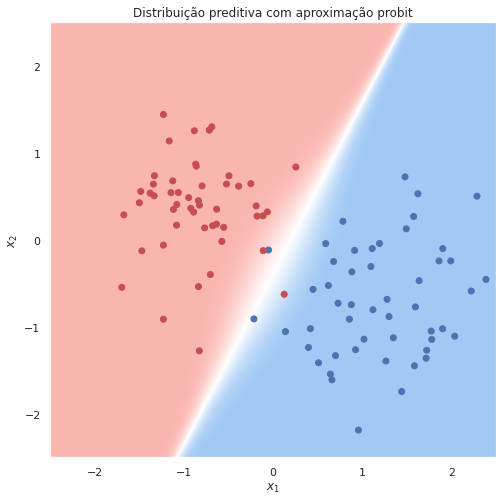

In [ ]:
from scipy import stats
import matplotlib.colors as mcolors

def generate_cmap(cmap_name: str, colours: 'List[str]', graduation:'List[float]|None'=None) -> 'LinearSegmentedColormap':
    '''
    Adaptado de: https://github.com/KerryHalupka/custom_colormap
    
    Generates a LinearSegmentedColormap based in a list of colours in hexadecimal format
    creates and returns a color map that can be used in heat map figures.

    If graduation is not provided, colour map graduates linearly between each color in colours.
    If graduation is provided, each color in hex_list is mapped to the respective location in graduation. 
    
    @param cmap_name: Name of the LinearSegmentedColormap generated
    @param colours: Colours in hex code format
    @param graduation: Floats between 0 and 1 with same length as hex_list. Must start with 0 and end with 1.

    @return colour map
    '''
    rgb_colours = [mcolors.to_rgb(colour) for colour in colours]
    graduation = graduation if graduation is not None else np.linspace(0, 1, len(rgb_colours))

    segmentdata = dict()
    for i, key in enumerate(['red', 'green', 'blue']):
        segmentdata[key] = [(f, colour[i], colour[i]) for f, colour in zip(graduation, rgb_colours)]
    
    return mcolors.LinearSegmentedColormap(cmap_name, segmentdata=segmentdata, N=256)

    
def plot_distribuicao(modelo, X, y, titulo, ax=None, niveis=100, **kwargs):
    tons_pasteis = ['#a1c9f4', '#FFF', '#fbb4ae']

    w = np.linspace(-2.5, 2.5, niveis)
    W = np.dstack(np.meshgrid(w, w))

    X_fundo = Φ(W.reshape((-1, 2)))
    y_fundo = modelo.predict(X_fundo, **kwargs).reshape((niveis, niveis))

    ax = plt.axes() if ax is None else ax
    cmap = generate_cmap('pastel_cmap', tons_pasteis)
    ax.contourf(w, w, y_fundo, levels=100, cmap=cmap)

    cores = (dataset_1.y == 1.0).map(lambda i: 'r' if i else 'b' )
    ax.scatter(X[:, 0], X[:, 1], c=cores)

    ax.set_title(titulo)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

plot_distribuicao(modelo_1, X=X, y=y, titulo="Distribuição preditiva com aproximação probit", metodo='probit')

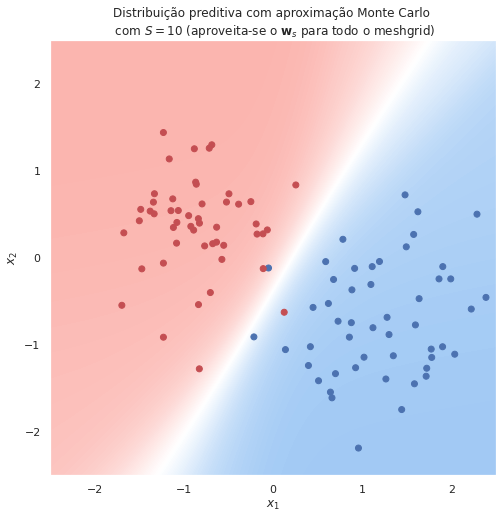

In [ ]:
plot_distribuicao(modelo_1, X=X, y=y, titulo="Distribuição preditiva com aproximação Monte Carlo \n com $S=10}$ (aproveita-se o $\mathbf{w}_s$ para todo o meshgrid)", metodo='monte_carlo', completamente_aleatorio=False)

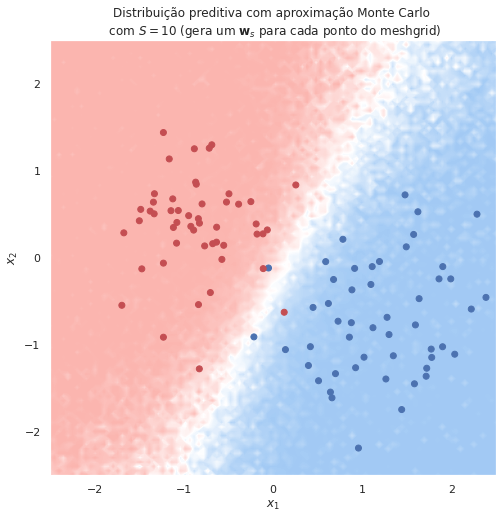

In [ ]:
plot_distribuicao(modelo_1, X=X, y=y, titulo="Distribuição preditiva com aproximação Monte Carlo \n com $S=10}$ (gera um $\mathbf{w}_s$ para cada ponto do meshgrid)", metodo='monte_carlo', completamente_aleatorio=True)

## Bônus: Utilização do modelo `RegressaoLogisticaIRLSSimplificada`

Utilização do modelo Regressão Logística não Bayesiano com treinamento com IRLS. A simplificação se dá na definição da priori
$p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{\mu}, \boldsymbol{\Sigma})$. Veja abaixo qual a simplificação aplicada.

### Implementação do modelo

`RegressaoLogisticaIRLSSimplificada` = Regressão Logística simplificada utilizando IRLS.

Nesta simplificação, basta definir $\sigma_w$.
Aqui:
  * $m_0=\boldsymbol{0}$;
  * $S_0= \sigma_w^2 \cdot I_D$.

* @param $D$: Quantidade de atributos (incluindo a constante $1$);
* @param $\sigma_w$: Desvio padrão da priori. Observe que é o parâmetro é o desvio padrão, **não** a variância
* @param σ: Função de ativação. Por padrão, sigmoid: $σ(z) = \frac{1}{1+\exp(-z)}$

In [ ]:
class RegressaoLogisticaIRLSSimplificada(RegressaoLogisticaIRLS):
    def __init__(self, D, σ_w, σ=sigmoid):
        """
        `RegressaoLogisticaIRLSSimplificada` = Regressão Logística simplificada utilizando IRLS.

        Nesta simplificação, basta definir $\sigma_w$.
        Aqui:
         * $m_0=\boldsymbol{0}$;
         * $S_0= \sigma_w^2 \cdot I_D$.

        @param $D$: Quantidade de atributos (incluindo a constante $1$);
        @param $\sigma_w$: Desvio padrão da priori. Observe que é o parâmetro é o desvio padrão, **não** a variância
        @param σ: Função de ativação. Por padrão, sigmoid: $σ(z) = \frac{1}{1+\exp(-z)}$
        """
        I_D = np.identity(D)
        
        m_0 = np.zeros((D, 1))
        S_0 = σ_w**2 * I_D

        super().__init__(D=D, m_0=m_0, S_0=S_0, σ=σ)

### Treinamento (estimação) do modelo

In [ ]:
#@title Hiperparâmetros do modelo
#@markdown Defina os hiperparâmetros do modelo que serão utilizados.

σ = "sigmoid" #@param ["sigmoid"]
σ_w = 1 #@param {type: "number"}

In [ ]:
X = dataset_1[['x1', 'x2']].to_numpy()
y = dataset_1[['y']].to_numpy()

N, D = Φ(X).shape
modelo_2 = RegressaoLogisticaIRLSSimplificada(D=D, σ_w=σ_w)
modelo_2.fit(Φ(X), y)

array([[ 0.51531419],
       [-2.81281332],
       [ 1.44860203]])

### Priori considerada

In [ ]:
Math(sp.latex(f"""
\\begin{{aligned}}
p(\\boldsymbol{{w}}) &= \mathcal{{N}}(\\boldsymbol{{w}}|\\boldsymbol{{m}}_0, \\boldsymbol{{S}}_0), \\\\
\\boldsymbol{{m}}_0 &= {sp.latex(sp.Matrix(modelo_2.m_0))}, \\\\
\\boldsymbol{{S}}_0 &= {sp.latex(sp.Matrix(modelo_2.S_0))}.
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

### Vetor de pesos $\hat{\boldsymbol{w}}$ aprendido

In [ ]:
Math(sp.latex(f"""
\\begin{{aligned}}
\\hat{{\\boldsymbol{{w}}}} &= {sp.latex(sp.Matrix(modelo_2.w))}.
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

### Gráfico solicitado na questão

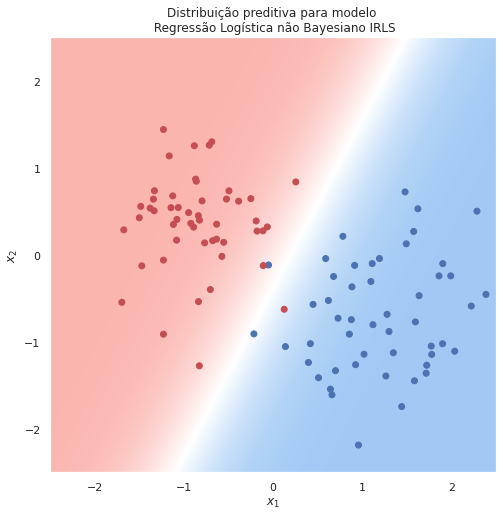

In [ ]:
plot_distribuicao(modelo_2, X=X, y=y, titulo="Distribuição preditiva para modelo \n Regressão Logística não Bayesiano IRLS")